> ### <center>  Exploratory Data Analysis & Sampling Distributions</center>

In [1]:
import os
os.chdir("/Users/pavitragajanana/My Files/Development/2. Data Files/")
os.getcwd()
# %ls

'/Users/pavitragajanana/My Files/Development/2. Data Files'

In [2]:
# One time installation of packages
#!pip install wquantiles 
#!pip install statsmodels

In [3]:
# Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import wquantiles  # includes
from statsmodels import robust
from sklearn.utils import resample

%matplotlib inline

In [4]:
# Load data from a csv file to a pandas dataframe
df_crudeoil = pd.read_csv("CrudeOil_Daily_Cushing_OK_WTI_Spot_Price_FOB.csv",encoding="latin",parse_dates=[0])

In [5]:
# Calculate yearly prices
df_annualcrudeoil = df_crudeoil.set_index('Day').WTISpotPrice.resample("BY").mean()
df_annualcrudeoil.head()

Day
1986-12-31    15.047689
1987-12-31    19.200512
1988-12-30    15.965409
1989-12-29    19.635486
1990-12-31    24.526576
Freq: BA-DEC, Name: WTISpotPrice, dtype: float64

> #### Estimates of Location

    A fundamental task in many statistical analyses is to estimate a location parameter for the distribution; i.e., to find a typical or central value that best describes the data.
    Most common location estimates used are mean, weighted mean, median, trimmed mean, weighted median, percentile and so on.
    Please Note  : 

    (1) Mean refers to the arithmetic mean of the dataset of N values given by 
$$\bar{x} = \frac{\sum_{i=1}^n x_i}{N}$$

    Some examples : 

    (2) Weighted mean is similar to arithematic mean, except that the contribution by each data point differs and is given by
$$ Weighted\space Mean =\bar{x}_w =  \frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i}$$

    (3) Trimmed Mean is again similar to arithematic mean but is void of all the outliers.(i.e. It removes a small  designated percentage of the largest and smallest values before calculating the mean)
    
    (4) Median is a simple measure of central tendency. To find the median, we arrange the observations in order from smallest to largest value. If there is an odd number of observations, the median is the middle value. If there is an even number of observations, the median is the average of the two middle values. 
   
       When n is odd,
    
$$ Median = x_\frac{(n+1)}{2} $$

       When n is even,
       
$$ Median = x_\frac{n}{2} + x_{\left(\frac{n}{2}+1\right)} $$

 
 
    (5) Weighted Median
    
    Points to remember : 
    
    (1) It is quite important to note that "Mean > Trimmed Mean > Median"





In [6]:
# Resamples data by the business year end
df_annualcrudeoil = df_crudeoil.set_index('Day').WTISpotPrice.resample("BY").mean()
weights = np.ones((1,df_annualcrudeoil.count()),dtype="int").T
    
# Mean uses numpy.mean
print(f'\nLocation Estimates\n\nMean = {np.round(np.mean(df_annualcrudeoil),2)}') 
  
# Weighted mean uses numpy.average with optional argument of weights     
print(f'\nWeighted mean = {np.round(np.average(pd.DataFrame(df_annualcrudeoil),weights=weights),2)}')

# Trimmed mean uses scipy.stats.trim_mean
print(f'\nTrimmed Mean ={np.round(stats.trim_mean(df_annualcrudeoil,0.1),2)}')

# Median uses numpy.median
print(f'\nMedian = {np.round(np.median(df_annualcrudeoil),2)}') 

# Weighted median uses quantile(data, weights, 0.5)
print(f'\nWeighted Median (equal weights) = {np.round(wquantiles.median(df_annualcrudeoil,np.repeat(1,df_annualcrudeoil.count())),2)}')


Location Estimates

Mean = 44.22

Weighted mean = 44.22

Trimmed Mean =41.62

Median = 30.73

Weighted Median (equal weights) = 30.73


> #### Estimates of Variability :

    (1) Deviation
    
    The difference between the observed values and the location estimate.
    
$$ Deviation = x_i  - \bar{x}$$ 

    (2) Mean absolute deviation 
    
    This measures the average variability/deviation of the values. Since averaging the deviation results in     zero, since the negative ones offset positive ones; mean deviation can be estimated on the absolute values.

$$ Mean\space absolute\space deviation = \frac{\sum_{i=1}^n\mid{x_i-\bar{x}\mid}}{n}$$

    (3) Variance & Standard deviation
    
    Variance and Standard deviation are the most commonly used and the best-known estimates of variability.
    Based on squared deviation, variance is the average of squared deviations and the Standard deviation is the square root of the variance.
    
$$Variance = s^2 =\frac{\sum\left(x - \bar{x}\right)^2}{n-1}$$

$$ Standard\space deviation = \sqrt{Variance}$$

    (4) Median absolute deviation from the median (MAD)
    
    MAD is robust to outliers/extreme values and is the median of the absolute deviation of observed values from the median
    
$$ Median\space absolute\space deviation = Median\left(\mid{x_1-m\mid},\mid{x_2-m\mid}....\mid{x_n-m\mid} \right)$$

    where m is the median
   
    (4)
    
    Points to remember : 
    1. degrees of freedom
    2. Neither the variance, the standard deviation nor the mean absolute deviation are robust to outliers

In [7]:
# Using np.std() for standard deviation
print(f'\nStandard Deviation  = {np.round(df_crudeoil["WTISpotPrice"].std(axis=0),2)}')
      
# Using np.quantile() for Interquartile range
print(f'\nInterquartile range = {np.round(df_crudeoil["WTISpotPrice"].quantile(0.75))-np.round(df_crudeoil["WTISpotPrice"].quantile(0.25))}')

# Using robust.scale.mad for Median absolute deviation from median
print(f'\nMAD = {np.round(robust.scale.mad(df_crudeoil["WTISpotPrice"]),2)}')
      
# Using np.quantile for array of quantile [5th, 25th, 50th, 75th and 95th]
print(f'\nQuantiles\n[5th,25th,50th,75th,95th]\n\n{pd.DataFrame(np.round(df_crudeoil["WTISpotPrice"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])))}')


Standard Deviation  = 29.32

Interquartile range = 44.0

MAD = 21.11

Quantiles
[5th,25th,50th,75th,95th]

      WTISpotPrice
0.05          15.0
0.25          20.0
0.50          31.0
0.75          64.0
0.95         101.0


> #### Statistics of Sampling Distribution 

    (1) Regression to Mean
        
    (2) Sample Statistic
        Metrics calculated on a sample drawn from a population.
        
    (3) Sampling Distribution
        The frequency distribution of a sample statistic over many samples or resamples.
        
    (4) Central Limit Theorem
        The tendency of the sampling distribution to take normal shape as the sample size increases
        
    (5) Standard error of the sample statistic
        The variability of a sample statistic over many samples.
    
$$Standard\space Error = SE = \frac{s}{\sqrt{n}}$$

    (6) Confidence Intervals

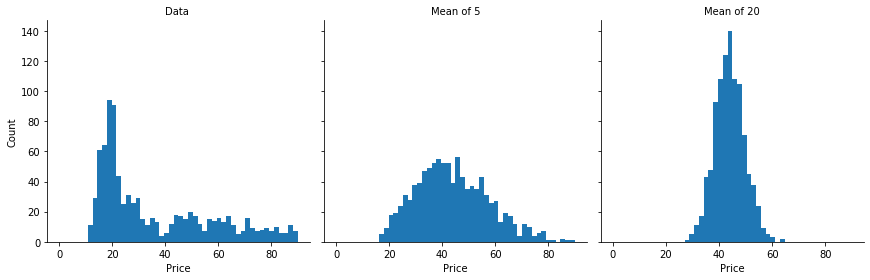

In [8]:
# Sampling Distribution and Central Limit Theorem
# Lets consider the daily prices of WTI Crude Oil
sample_data = pd.DataFrame({
    'price': df_crudeoil.WTISpotPrice.sample(1000),
    'type': 'Data ',})

sample_mean_05 = pd.DataFrame({
    'price': [df_crudeoil.WTISpotPrice.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',})

sample_mean_20 = pd.DataFrame({
    'price': [df_crudeoil.WTISpotPrice.sample(30).mean() for _ in range(1000)],
    'type': 'Mean of 20',})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

# Building structured multi-plot grids using sns.FacetGrid
g = sns.FacetGrid(results, col='type', col_wrap=3, height=4, aspect=1)
g.map(plt.hist, 'price', range=[0, 90], bins=50)

# Set parameters of the plot
g.set_axis_labels('Price', 'Count')
g.set_titles('{col_name}')


Q-Q Plot for the previously sampled crude oil prices


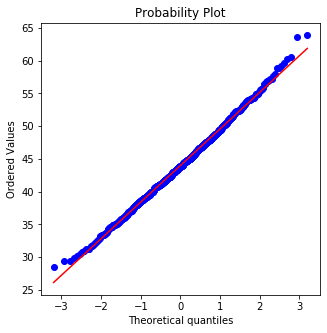

In [57]:
# Q-Q Plot
fig, ax = plt.subplots(figsize=(5, 5))
stats.probplot(sample_mean_20['price'], plot=ax)
print('Q-Q Plot for the previously sampled crude oil prices')

> #### Bootstrapping



In [9]:
# Bootstrapping, Bias and Standard Error
results = []
for _ in range(2000):
    # Implements resampling with replacement
    sample = resample(df_crudeoil.WTISpotPrice)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:\n')
print(f'Original: {df_crudeoil.median()[0]}')
print(f'Bias: {np.round(results.mean() - df_crudeoil.median()[0],5)}')
print(f'Standard error: {np.round(results.std(),5)}')

Bootstrap Statistics:

Original: 30.63
Bias: 0.0378
Standard error: 0.40818


> #### Sampling Distributions

    (1) Normal Distribution
    (2) Uniform Distribution
    (3) Bernoulli Distribution
    (4) Lognormal Distribution
    (5) Burr Distribution
    (6) Beta Distribution
    (7) Poisson Distribution
    (8) Gamma Distribution
    (9) Student's t Distribution
    (10) Chi-Squared Distribution
    (11) F Distribution
    (12) Exponential Distribution
    (13) Weibull Distribution
    (14) Binomial Distribution

> ##### Normal Distribution

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^\frac{{-\left(x-\mu\right)^2}}{2\sigma^2}$$

where $\mu$ is loc keyword and $\sigma$ is scale keyword

AttributeError: 'Rectangle' object has no property 'frameon'

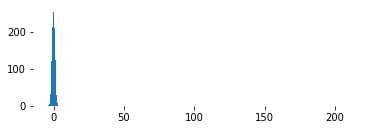

In [73]:
# Generates a normal random sample
normal_sample = stats.norm.rvs(size=1000)
ax1 = plt.subplot(211, frameon=False)
plt.hist(normal_sample)
ax2 = plt.hist(212,frameon=False)
plt.hist(normal_sample)

()